In [1]:
print('')

aim to plot change in gradient as consider changing minimum magntiude of data

In [69]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
import math
import resample_df

import scipy
from tabulate import tabulate

from cmcrameri import cm

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from varience_of_mag_func import *
#from spearman_plotting_func import *

change magnitude limits, colors in functions file

In [5]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']

'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']'''

'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5', 
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr20', 
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr20', 
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20', 
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr20']'''

"filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5', \n             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5', \n             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5', \n             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',\n     

## all on one plot

In [6]:
def name_to_time(f):
    l = f.split('_')
    time = l[2][:-1]
    if time == '1' or time == '4':
        return time
    else:
        time = time[0]+'.'+time[1]
        return time

def name_to_snr(f):
    l = f.split('_')
    snr = l[-1]
    if snr[0:3]=='snr':
        return snr[3:]
    
def name_to_blank(f):
    l = f.split('_')
    blank = l[9]
    return blank

eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

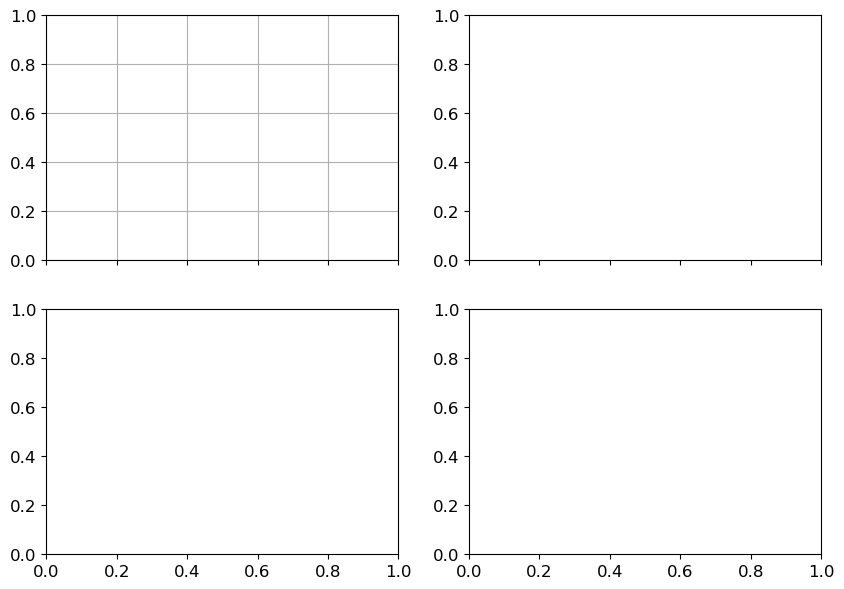

In [8]:
%matplotlib inline
for f in filenames:
    for n_stations in [1]:#,2,5,10]:
        print(f)
        df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
        df = resample_df.make_subset_df(df, 10000)
        print('generated')
        #n_stations = 0
        x_tp, y_tp = calc_tp_mag_lim(df, 3.)
        x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.)
        x_tc, y_tc = calc_tc_mag_lim(df, 3.)
        x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.)


        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tp_mag_lim(df, mag_lim,n=n_stations)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(y,x, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
        tp_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_pgd_mag_lim(df, mag_lim,n=n_stations)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(y,x, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
        pgd_pearson = pearson
        pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tc_mag_lim(df, mag_lim,n=n_stations)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(y,x, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
        tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
        tc_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_iv2_mag_lim(df, mag_lim,n=n_stations)
            #print(len(x[y==0]))
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(y,x, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
        iv2_pearson = pearson



In [23]:
x_list =  [y_tp, y_pgd, y_tc, y_iv2]

In [30]:
np.array(x_list[0])

array([-0.39264436, -0.59027058,  0.44762668, ..., -0.23699784,
        0.02377387,  0.35089824])

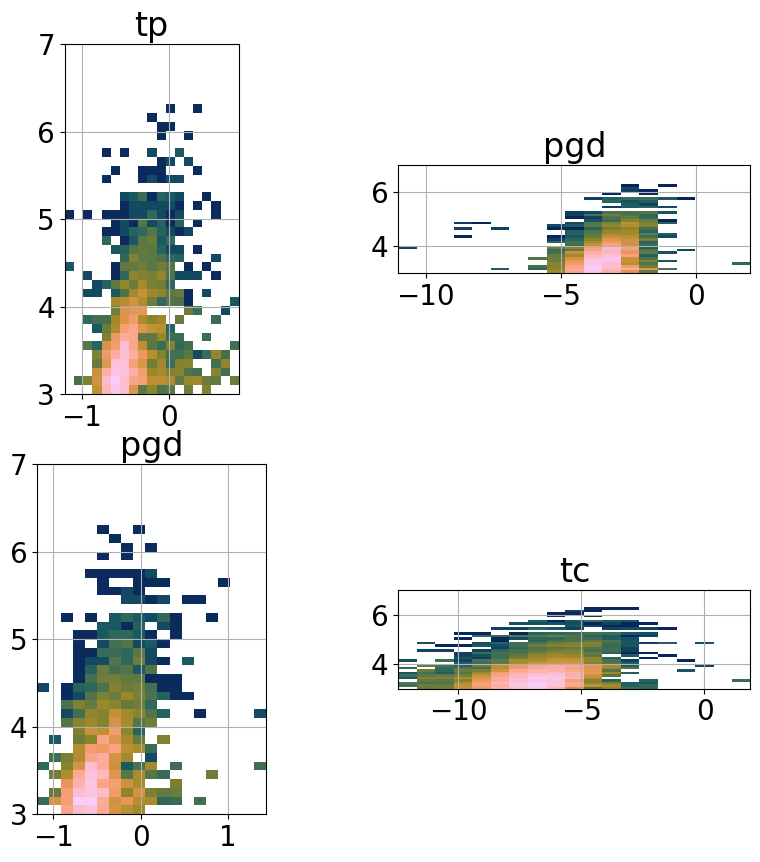

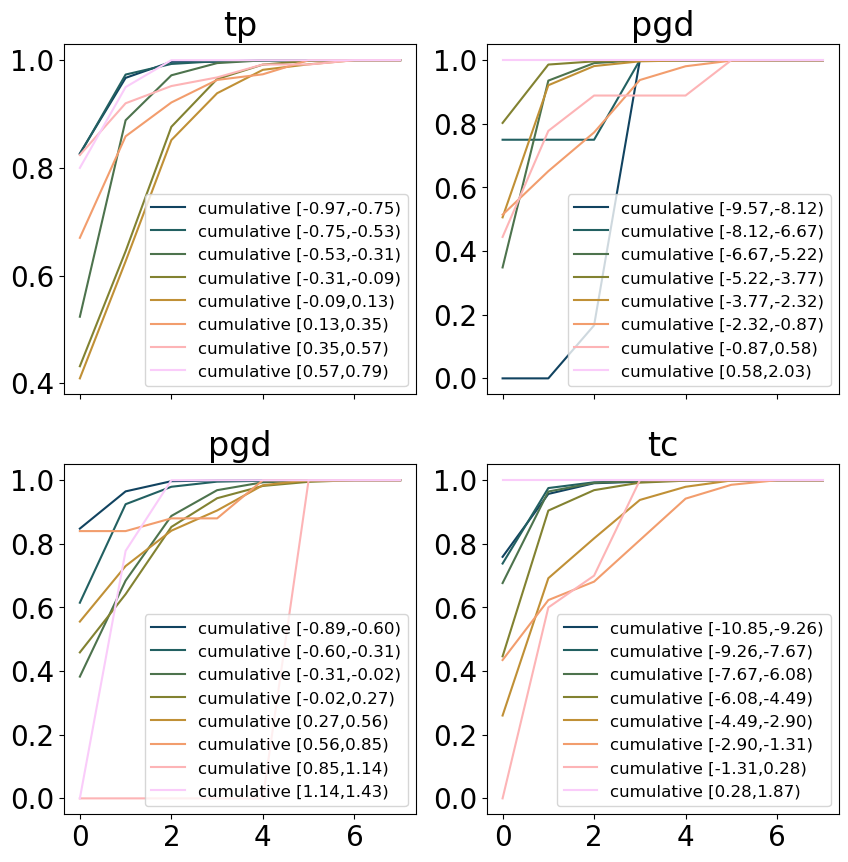

In [145]:

        ########################
        y_list =  [x_tp, x_pgd, x_tc, x_iv2]
        x_list =  [y_tp, y_pgd, y_tc, y_iv2]
        types = ['tp','pgd','tc','iv2']
        #print(x_list[0])
        
        magnitudes = np.arange(3,7.1, 0.1)
        colors = {'tp':'#7f58af', 'tc':'#e84d8a', 'iv2' : '#64c5eb', 'pgd' : '#7fb646'}

        window_lengths = {'0.3':4, '0.5':4.4, '1' : 5.02, '4' : 6.22}


        params = [tp_params, pgd_params, tc_params, iv2_params]
        time = name_to_time(f)
        snr = name_to_snr(f)
        blank = name_to_blank(f)
        #[gradt, gradt_std, intercept, intercept_std]
        x_unique = np.arange(3,8,0.1)
        fig, axs = plt.subplots(2,2,figsize = (10,10))#, sharex = True)
        fig2, axs2 = plt.subplots(2,2, figsize=(10,10),sharex = True)
        for i in range(0, 4):
            row = i//2
            col = i%2
            
            axs[row][col].grid(True)
            #axs[row][col].scatter(x_list[i]+np.random.uniform(-0.05, 0.05, len(x_list[i])), y_list[i], marker = 'x', color = colors[types[i]], s = 10, alpha = 0.5, zorder = 80)
            #axs[row][col].set_ylabel(types[i], fontsize = 12, labelpad = -2)fig, axs = plt.subplots(len(H),1, figsize=(12,24),sharex = True)
        # for i in range(len(H)-1,0,-1):
        #     j = len(H)-i
        #     axs[i].plot(H[j]/np.sum(H[j]), label = 'normalised')
        #     axs[i].set_yscale('log')
        #     axs[i].set_xticks(np.arange(0, len(H.T), 10), np.arange(3, 7,1))
        #     axs[i].plot(np.cumsum(H[j]/sum(H[j])))
        #     axs[i].set_xticks(np.arange(0, len(H.T)), label = 'cumulative')
            #axs[row][col].tick_params(axis='both', which='major', labelsize=12)
            #axs[row][col].set_yticks([3,4,5,6,7,8], zorder = 110)
            x_unique = np.arange(3,8, 0.1)

            #median, bin_edges, bin_number = scipy.stats.binned_statistic(x_list[i], y_list[i], statistic='median', bins=np.arange(2.95,8.05,0.1), range=None)
            #axs[row][col].scatter(bin_edges[:-1]+0.05, median, marker = 'o', facecolor = 'lightgrey', edgecolors = colors[types[i]], zorder = 1000)

            #plt.figure(figsize=(20,10))
            x_limits = np.linspace(min(x_list[i]), max(x_list[i]), 20)
            y_limits = np.linspace(3, 7, 41)
            H, xedges, yedges = np.histogram2d(list(x_list[i]), list(y_list[i]), bins=[x_limits, y_limits])
            H = H.T

            axs[row][col].imshow(np.log(H), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], (yedges[0]), (yedges[-1])], cmap = cm.batlow, vmin = np.log10(0.5))
            #plt.colorbar(label = 'log10(histogram amplitude)')
            
            
            x_limits = np.linspace(min(x_list[i]), max(x_list[i]), 10)
            y_limits = np.linspace(3, 7, 9)
            H, xedges, yedges = np.histogram2d(list(x_list[i]), list(y_list[i]), bins=[x_limits, y_limits])
            H = H
            colors = cm.batlow(np.linspace(0,1,len(H)))
            for i in range(len(H)-1,0,-1):
                j = len(H)-i
                c = (j*256/8)
                #axs2.plot(H[j], label = 'normalised', color = colors[j])
                #axs2[row][col].plot(H[j]/np.sum(H[j]), label = f'[{x_limits[j]:.2f},{x_limits[j+1]:.2f})', color = colors[j])
                axs2[row][col].plot(np.cumsum(H[j]/sum(H[j])), label = f'cumulative [{x_limits[j]:.2f},{x_limits[j+1]:.2f})', color = colors[j])
                axs2[row][col].legend(fontsize = 12)
                axs[row][col].set_title(types[row+col])
                axs2[row][col].set_title(types[row+col])
                #axs2[i].set_yscale('log')
                #axs2.set_xticks(np.arange(0, len(H.T)+2), np.linspace(3, 7.5, 10))
                #axs2.plot(np.cumsum(H[j]/sum(H[j])))
                #axs2[i].set_xticks(np.arange(0, len(H.T)), label = 'cumulative')
            #plt.ylabel('log10(tp_max)')
            #plt.xlabel('magntitude')
            #plt.ylim([-1,3])
            #fig2.legend()


In [134]:
x_limits[j]

0.27822335723932134

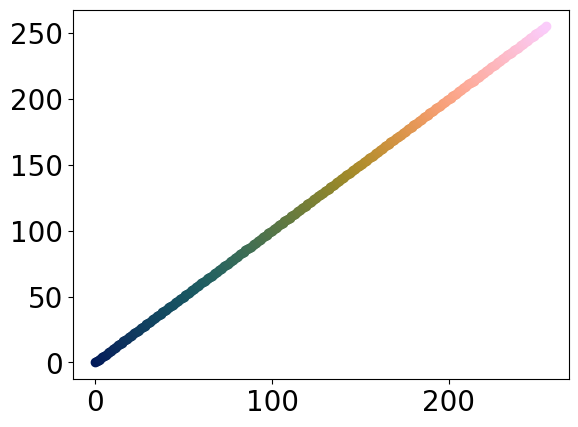

In [93]:
for i in range(0,256):
    plt.scatter(i,i,color=cm.batlow(i))

In [60]:
np.linspace(3, 7, 9)

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ])

In [146]:
%matplotlib inline
for f in filenames:
    #print(f)
    time = name_to_time(f)
    snr = name_to_snr(f)
    blank = name_to_blank(f)
    
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')

    x_tp, y_tp = calc_tp_mag_lim(df, 3.)
    x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.)
    x_tc, y_tc = calc_tc_mag_lim(df, 3.)
    x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.)

    
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_tp_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(y,x, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
    tp_pearson = pearson
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_pgd_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(y,x, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
    pgd_pearson = pearson
    pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_tc_mag_lim(df, mag_lim)
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(y,x, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
    tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
    tc_pearson = pearson
    gradt, intercept, gradt_std, intercept_std = [],[],[],[]
    pearson = []
    spearman = []
    spearman_p = []
    n_l = []
    
    for mag_lim in magnitudes:
        x, y = calc_iv2_mag_lim(df, mag_lim)
        #print(len(x[y==0]))
        gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(y,x, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
    iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
    iv2_pearson = pearson
    
    headers=["","M3+", "M4+", "M4.4+","M5.2+","M6+"]

    a = [[tp_pearson[i]**2 for i in [0,10,14,22,30]],
         [tc_pearson[i]**2 for i in [0,10,14,22,30]],
         [iv2_pearson[i]**2 for i in [0,10,14,22,30]],
         [pgd_pearson[i]**2 for i in [0,10,14,22,30]]]

    rowIDs = ['tp','tc','iv2','pgd']
    print('\\begin{table}[ht]')
    print('\centering')
    print(tabulate(a, tablefmt="latex", floatfmt=".2f",showindex=rowIDs, headers = headers))
    print(f'\caption{{Percentage of varience explained by a linear least squares fit. Window = {time}, blank = {blank}, snr = {snr}}}')
    print(f'\label{{table:varience_{time}_{blank}_{snr}}}')
    print('\end{table}')

\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
\hline
     &   M3+ &   M4+ &   M4.4+ &   M5.2+ &   M6+ \\
\hline
 tp  &  0.20 &  0.03 &    0.01 &    0.00 &  0.00 \\
 tc  &  0.28 &  0.07 &    0.03 &    0.02 &  0.02 \\
 iv2 &  0.21 &  0.08 &    0.07 &    0.13 &  0.07 \\
 pgd &  0.31 &  0.07 &    0.03 &    0.05 &  0.03 \\
\hline
\end{tabular}
\caption{Percentage of varience explained by a linear least squares fit. Window = 0.3, blank = 0, snr = 20}
\label{table:varience_0.3_0_20}
\end{table}
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
\hline
     &   M3+ &   M4+ &   M4.4+ &   M5.2+ &   M6+ \\
\hline
 tp  &  0.24 &  0.05 &    0.03 &    0.00 &  0.00 \\
 tc  &  0.44 &  0.19 &    0.10 &    0.02 &  0.01 \\
 iv2 &  0.30 &  0.11 &    0.09 &    0.15 &  0.08 \\
 pgd &  0.43 &  0.15 &    0.07 &    0.07 &  0.03 \\
\hline
\end{tabular}
\caption{Percentage of varience explained by a linear least squares fit. Window = 0.5, blank = 0, snr = 20}
\label{table:varience_0.5_0_20}
\end{table}
